import required dependencies

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle

store the data to different collumns

In [176]:
training_data = pd.read_csv('training_data.csv')

x_name = ['Combined1']
y_name = 'rb_win_rate'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

plot training data on a graph

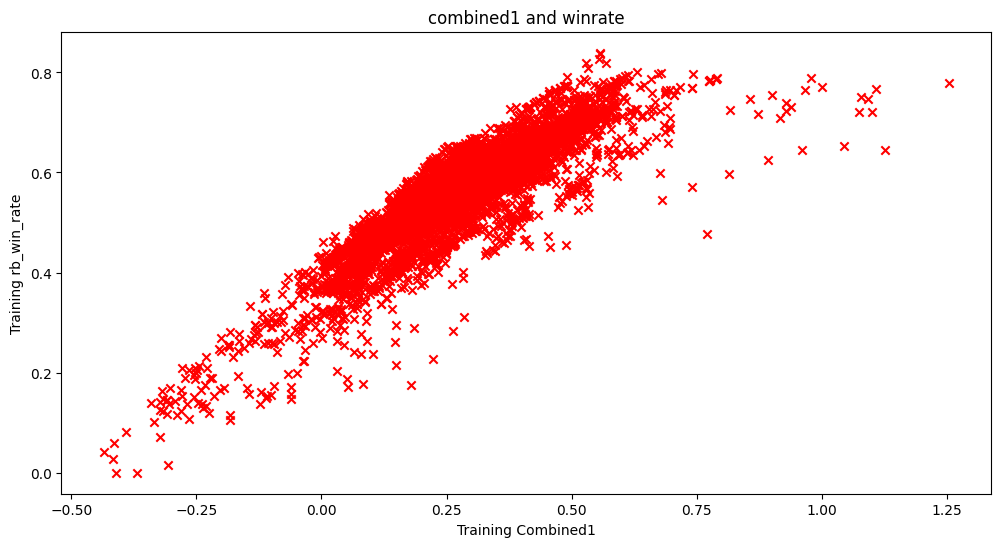

In [177]:
plt.figure(figsize=(12, 6))
if(len(x_name) == 1):
    plt.scatter(x, y, marker='x', c='r')
    plt.title("combined1 and winrate")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,6))
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("winrate based on date scaled")
plt.show()

In [178]:
training_data.describe()

,rb_lower_br,rb_battles_sum,rb_battles_mean,rb_win_rate,rb_air_frags_per_battle,rb_air_frags_per_death,rb_ground_frags_per_battle,rb_ground_frags_per_death,avgwr,Combined1
count,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6794.000000,6822.000000
mean,6.648182,8857.220170,930.659798,0.564686,0.081559,0.082517,0.139277,0.363425,0.559622,0.278465
std,3.222493,10321.464037,1157.649926,0.101818,0.078260,0.077153,0.061879,0.131697,0.109021,0.150651
min,1.000000,62.000000,5.400000,0.000000,0.000000,0.000000,0.002112,0.000000,0.154824,-0.435247
25%,4.000000,1890.000000,250.385243,0.511474,0.017071,0.016485,0.101945,0.271633,0.503095,0.189934
50%,6.700000,4975.000000,593.743739,0.580026,0.069770,0.067944,0.128413,0.347168,0.578684,0.279904
75%,9.300000,11552.000000,1102.874671,0.628445,0.119327,0.126976,0.166801,0.442418,0.625308,0.367051
max,12.000000,62206.000000,11051.000000,0.839313,0.738555,0.568807,0.976373,1.000000,0.788136,1.254623


save an instance of polynomal features (degree is x)

In [179]:
# Combine x and y into a DataFrame for consistent filtering
data = pd.DataFrame({'x': x.flatten(), 'y': y})

# Drop rows with NaN values in either x or y
data = data.dropna()

# Extract filtered x and y
x = data['x'].values.reshape(-1, 1)
y = data['y'].values

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x)

# Create and fit the model
my_model = LinearRegression()
my_model.fit(poly_features, y)

plt.show()

plot the features, targets and model

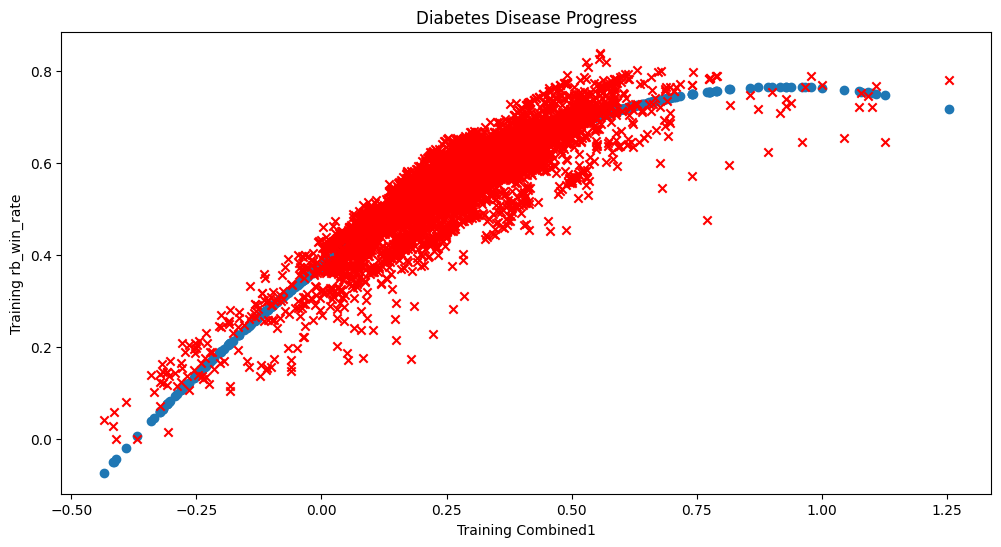

In [180]:
plt.figure(figsize=(12, 6))
y_pred = my_model.predict(poly_features)
if(len(x_name) == 1):
    plt.scatter(x, y_pred)
    plt.scatter(x, y, marker='x', c='r')
    plt.title("Diabetes Disease Progress")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,6),sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
        ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("Diabetes Disease Progress")
plt.show()

save model for evaluation

In [181]:
pickle.dump(my_model, open('../4.Model Testing and Validation/my_saved_model_v1.sav', 'wb'))
pickle.dump(poly, open('../4.Model Testing and Validation/poly_features.sav', 'wb'))
